<a href="https://colab.research.google.com/github/falcaodf/transfer_learning_dio/blob/main/tranfer_learning_wendell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
import zipfile
import os

zip_path = "/content/sample_data/kagglecatsanddogs_5340.zip"
extract_path = "/content/cats_and_dogs"

# Criar pasta de destino
os.makedirs(extract_path, exist_ok=True)

# Extrair
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extração concluída!")
print("Pastas dentro:", os.listdir(extract_path))







Extração concluída!
Pastas dentro: ['CDLA-Permissive-2.0.pdf', 'readme[1].txt', 'PetImages']


In [ ]:
root = "/content/cats_and_dogs/PetImages"
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['/content/cats_and_dogs/PetImages/Dog', '/content/cats_and_dogs/PetImages/Cat']


In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(96, 96))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
from PIL import UnidentifiedImageError

data = []
erros = 0
avisos = 0

for c, category in enumerate(categories):
    images = [
        os.path.join(dp, f)
        for dp, dn, filenames in os.walk(category)
        for f in filenames
        if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']
    ]
    for img_path in images:
        try:
            img, x = get_image(img_path)
            data.append({'x': np.array(x[0]), 'y': c})
        except UnidentifiedImageError:
            print(f"[AVISO] Arquivo inválido, ignorando: {img_path}")
            avisos += 1
            continue
        except Exception as e:
            print(f"[ERRO] Falhou ao processar {img_path}: {e}")
            erros += 1
            continue

# contar número de classes
num_classes = len(categories)

print(f"\nResumo: {len(data)} imagens carregadas | {avisos} inválidas | {erros} erros")



/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


[AVISO] Arquivo inválido, ignorando: /content/cats_and_dogs/PetImages/Dog/11702.jpg
[AVISO] Arquivo inválido, ignorando: /content/cats_and_dogs/PetImages/Cat/666.jpg

Resumo: 24998 imagens carregadas | 2 inválidas | 0 erros


**Randomize the data order.**

In [ ]:
random.shuffle(data)

create training / validation / test split (70%, 15%, 15%)**negrito**

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(3750, 2)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 24998 images from 2 categories
train / validation / test split: 17498, 3750, 3750
training data shape:  (17498, 96, 96, 3)
training labels shape:  (17498, 2)


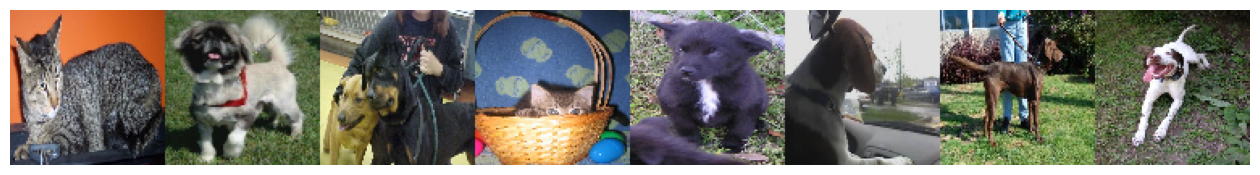

In [ ]:
images = [os.path.join(dp, f)
          for dp, dn, filenames in os.walk(root)
          for f in filenames
          if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]

# seleciona 8 imagens aleatórias
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(96, 96)) for i in idx]  # 96x96

# converte para array e concatena horizontalmente
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)

# exibe
plt.figure(figsize=(16,4))
plt.imshow(concat_image)
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, Input

model = Sequential()
print("Input dimensions: ", x_train.shape[1:])

# primeira camada como Input explícito
model.add(Input(shape=x_train.shape[1:]))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


Input dimensions:  (96, 96, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 94, 94, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,482 (626.88 KB)

 Trainable params: 160,482 (626.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.5549 - loss: 0.6779 - val_accuracy: 0.6253 - val_loss: 0.6318
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6592 - loss: 0.6143 - val_accuracy: 0.7400 - val_loss: 0.5359
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7432 - loss: 0.5170 - val_accuracy: 0.7835 - val_loss: 0.4705
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7774 - loss: 0.4662 - val_accuracy: 0.7981 - val_loss: 0.4371
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8062 - loss: 0.4260 - val_accuracy: 0.8027 - val_loss: 0.4310
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8205 - loss: 0.3968 - val_accuracy: 0.8213 - val_loss: 0.4030
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8304 - loss: 0.3762 - val_accuracy: 0.8523 - val_loss: 0.3554
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8518 - loss: 0.3395 - val_acc

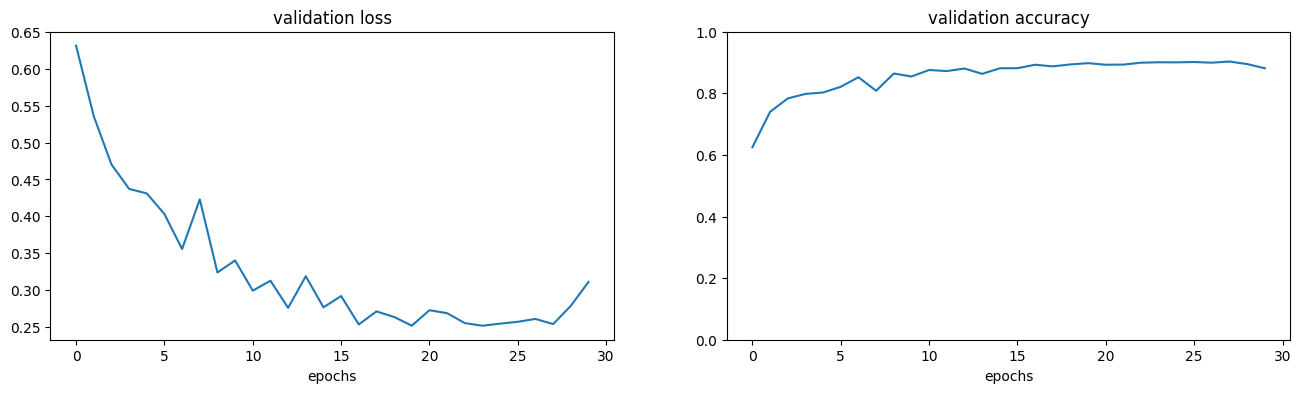

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.29461854696273804
Test accuracy: 0.881600022315979


In [ ]:
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(96,96,3))
vgg_base.trainable = False  # congela os pesos


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import VGG16

# cria a base do VGG sem o topo, com input 96x96
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(96,96,3))
vgg_base.trainable = False  # congela todos os pesos

# constrói novo modelo
x = layers.Flatten()(vgg_base.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(num_classes, activation='softmax')(x)

model_new = Model(vgg_base.input, out)


In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,304,898 (58.38 MB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 15,304,640 (58.38 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=50)
restore_best_weights = True

history2 = model_new.fit(
    x_train, y_train,
    batch_size=16,  # menor batch size
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.7068 - loss: 0.5658 - val_accuracy: 0.7595 - val_loss: 0.5164
Epoch 2/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7020 - loss: 0.5654 - val_accuracy: 0.7528 - val_loss: 0.5144
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7087 - loss: 0.5629 - val_accuracy: 0.7587 - val_loss: 0.5148
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.7058 - loss: 0.5628 - val_accuracy: 0.7523 - val_loss: 0.5245
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6945 - loss: 0.5713 - val_accuracy: 0.7605 - val_loss: 0.5140
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7045 - loss: 0.5680 - val_accuracy: 0.7421 - val_loss: 0.5169
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7012 - loss: 0.5620 - val_accuracy: 0.7629 - val_loss: 0.5163
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7027 -

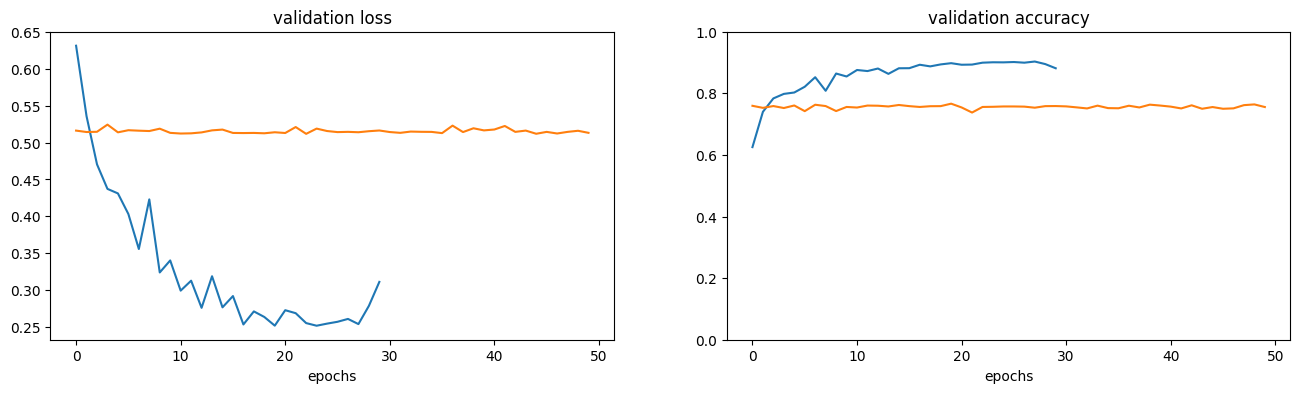

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5082604289054871
Test accuracy: 0.7650666832923889


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classe prevista: Cat, Probabilidade: 0.69


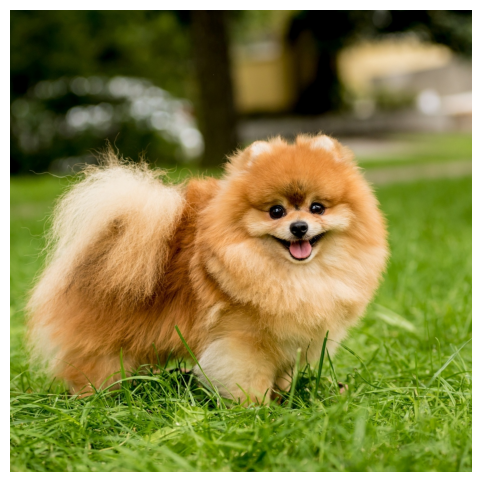

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# Função para carregar e pré-processar a imagem para o modelo
def get_image(path, target_size=(96, 96)):
    """
    Carrega uma imagem redimensionada para o modelo e retorna:
    - img: objeto PIL redimensionado (para referência, não para plot)
    - x: array numpy pré-processado, shape=(1, H, W, 3)
    """
    img = image.load_img(path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # normalização para o modelo
    return img, x

# Lista de categorias
categories = ['Cat', 'Dog']

# Caminho da imagem que você quer testar
img_path = '/content/sample_data/cachorro-da-raca-lulu-da-pomeramia-1648065976007_v2_1x1.jpg'

# Carrega a imagem redimensionada para o modelo
img_model, x = get_image(img_path, target_size=(96,96))

# Faz a previsão
probabilities = model_new.predict(x)  # sem colchetes

# Classe prevista
pred_class = np.argmax(probabilities)
print(f"Classe prevista: {categories[pred_class]}, Probabilidade: {probabilities[0][pred_class]:.2f}")

# Carrega a imagem ORIGINAL para exibição
img_original = Image.open(img_path)  # mantém resolução original

# Mostra a imagem original
plt.figure(figsize=(6,6))
plt.imshow(img_original)
plt.axis('off')
plt.show()
